In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

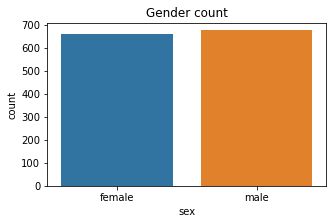

In [8]:
plt.figure(figsize=(5,3))
sns.countplot("sex",data=df)
plt.title("Gender count")
plt.show()
#plt.tight_layout()

Here, we can see that there are equal number of Males and Females.

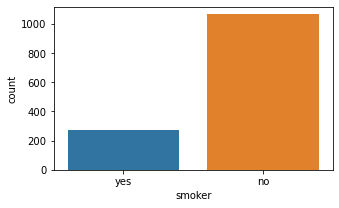

In [9]:
plt.figure(figsize=(5,3))
sns.countplot("smoker", data=df)
plt.show()

Large number of non smokers are present

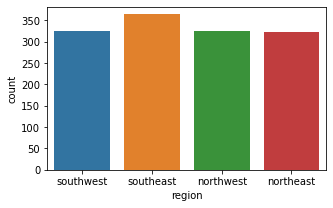

In [10]:
plt.figure(figsize=(5,3))
sns.countplot("region", data=df)
plt.show()

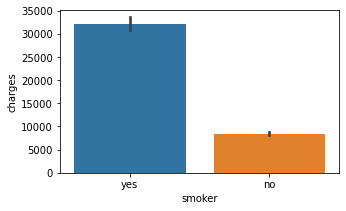

In [11]:
plt.figure(figsize=(5,3))
sns.barplot("smoker","charges", data=df)
plt.show()

Here, we can see that charges for smokers is much more than the non-smokers.

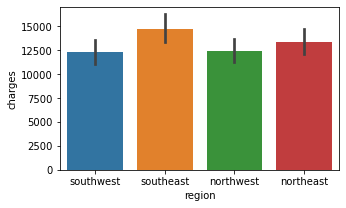

In [12]:
plt.figure(figsize=(5,3))
sns.barplot("region","charges", data=df)
plt.show()

Southeast region pay a little more charges when compared to other regions

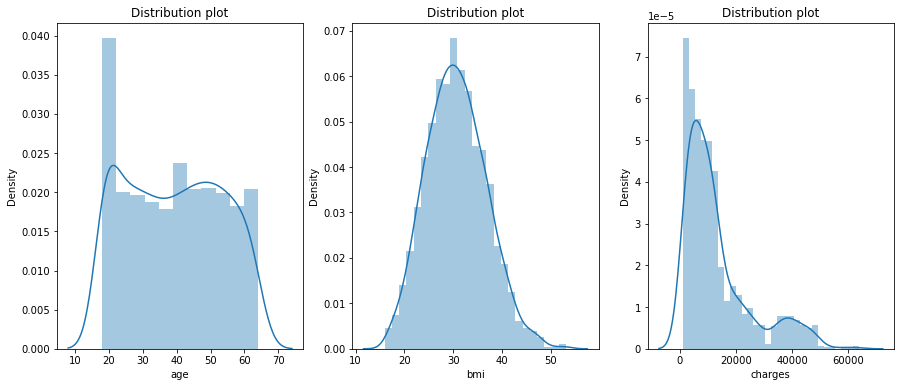

In [13]:
li=["age", "bmi", "charges"]
plt.figure(figsize=(15,6))
c=1
for i in li:
    plt.subplot(1,3,c)
    sns.distplot(df[i])
    plt.title("Distribution plot")
    c+=1

Here we can see no irregularities. Age in the range of 20s is more in number.

In [14]:
df.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

In [15]:
# encode the categorical columns
from sklearn.preprocessing import LabelEncoder

In [16]:
le= LabelEncoder()

In [17]:
enc1= le.fit_transform(df["sex"])
enc2= le.fit_transform(df["children"])
enc3= le.fit_transform(df["smoker"])
enc4= le.fit_transform(df["region"])

In [18]:
df["sex"]=enc1
df["children"]= enc2
df["smoker"]= enc3
df["region"]= enc4

In [19]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
684,33,0,18.500,1,0,3,4766.02200
1323,42,0,40.370,2,1,2,43896.37630
650,49,0,42.680,2,0,2,9800.88820
1245,28,1,24.300,5,0,3,5615.36900
1160,43,0,34.580,1,0,1,7727.25320
702,53,1,41.470,0,0,2,9504.31030
1033,18,1,21.565,0,1,0,13747.87235
104,34,0,27.500,1,0,3,5003.85300
1067,39,1,42.655,0,0,0,5757.41345
1050,44,0,36.955,1,0,1,8023.13545


In [20]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

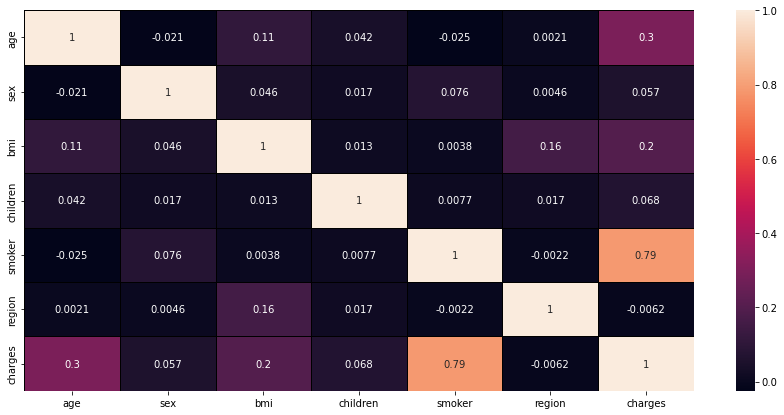

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth= 0.5, linecolor="black")

From the heatmap, we can say that smoker and charges are strongly correlated. Hence, smoker pays more charges for the medical insurance

In [22]:
'''from sklearn.preprocessing import StandardScaler
std= StandardScaler()
df["bmi"]= std.fit_transform(df[["bmi"]])
df["charges"]= std.fit_transform(df[["charges"]])
df["age"]= std.fit_transform(df[["age"]])'''

'from sklearn.preprocessing import StandardScaler\nstd= StandardScaler()\ndf["bmi"]= std.fit_transform(df[["bmi"]])\ndf["charges"]= std.fit_transform(df[["charges"]])\ndf["age"]= std.fit_transform(df[["age"]])'

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
# separating features and variables

x= df.drop("charges", axis=1)
y= df["charges"]

In [25]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [26]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score

In [28]:
lr= LinearRegression()
acc=0
rs=0
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    y_pred= lr.predict(x_test)
    
    accuracy= r2_score(y_test, y_pred)
    
    if accuracy>acc:
        acc= accuracy
        rss= i
        
        print("Best r2_score now is {0} at random state {1}".format(acc, rss))

Best r2_score now is 0.7998747145449958 at random state 0
Best r2_score now is 0.8042530077698924 at random state 122


In [40]:
#train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=122)

In [41]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


### LinearRegression

In [42]:
lr= LinearRegression()

lr.fit(x_train, y_train)
y_pred1= lr.predict(x_test)
y_trpred1= lr.predict(x_train)

print("Training data prediction is", r2_score(y_train,y_trpred1))
print("Testing data prediction is", r2_score(y_test, y_pred1))


Training data prediction is 0.7343955172848409
Testing data prediction is 0.8042530077698924


### RandomForestRegressor

In [72]:
rf= RandomForestRegressor(n_estimators=200)
rf.fit(x_train, y_train)
y_trpred2= rf.predict(x_train)
y_pred2= rf.predict(x_test)
print("Training data prediction is", r2_score(y_train,y_trpred2))
print("Testing data prediction is", r2_score(y_test, y_pred2))


Training data prediction is 0.9749741183131487
Testing data prediction is 0.8840807636129523


### SVM

In [73]:
svr= SVR()
svr.fit(x_train, y_train)
y_trpred3= svr.predict(x_train)
y_pred2= svr.predict(x_test)
print("Training data prediction is", r2_score(y_train,y_trpred3))
print("Testing data prediction is", r2_score(y_test, y_pred2))

Training data prediction is -0.10513655062879979
Testing data prediction is -0.1831005555619698


Here, Random Forest is working with better accuracy

In [79]:
#prediction

#22	1	37.620	1	1	2	37165.16380
df2=pd.DataFrame({"age": 22, "sex":1, "bmi": 37.620, "children": 1, "smoker":1, "region":2}, index=[0])

print("Randomforest Predicted charges in USD is",rf.predict(df2))
print("Linear Regression Predicted charges in USD is",lr.predict(df2))
print("Predicted charges in USD is",svr.predict(df2))

Randomforest Predicted charges in USD is [37816.42991945]
Linear Regression Predicted charges in USD is [29237.16577962]
Predicted charges in USD is [8917.63337856]
